**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [2]:
# ENTER YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.

*(Content shortened for brevity)*

### BINARY CLASSIFICATION

In [3]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

'gdown' is not recognized as an internal or external command,
operable program or batch file.


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [4]:
# ENTER YOUR CODE HERE
df = pd.read_csv("C:/Users/chhon/Downloads/nba_logreg.csv")
df

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [5]:
#ENTER YOUR CODE HERE
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1340
Number of columns: 21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [7]:
#ENTER YOUR CODE HERE

In [8]:
col = df.columns
col

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

**What does the beginning of the dataset look like?**

In [9]:
#ENTER YOUR CODE HERE

In [10]:
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [11]:
#ENTER YOUR CODE HERE

In [12]:
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

**What is the shape of the dataframe now?**

In [14]:
#ENTER YOUR CODE HERE

In [15]:
print('Shape of the dataframe post dropping rows with NaN values is:', df.shape)

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [16]:
#ENTER YOUR CODE HERE

In [17]:
X = df.drop(['TARGET_5Yrs','Name'], axis=1)
y = df['TARGET_5Yrs']
print('Shape of the features dataframe is:', X.shape)
print('Shape of the labels dataframe is:', y.shape)

Shape of the features dataframe is: (1329, 19)
Shape of the labels dataframe is: (1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [18]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [19]:
#ENTER YOUR CODE HERE

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of the training features dataframe is:', X_train.shape)
print('Shape of the training labels dataframe is:', y_train.shape)
print('Shape of the testing features dataframe is:', X_test.shape)
print('Shape of the testing labels dataframe is:', y_test.shape)
print('The train to test split ratio',X_train.shape[0]/X_test.shape[0])

Shape of the training features dataframe is: (1063, 19)
Shape of the training labels dataframe is: (1063,)
Shape of the testing features dataframe is: (266, 19)
Shape of the testing labels dataframe is: (266,)
The train to test split ratio 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [21]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [22]:
#ENTER YOUR CODE HERE

In [23]:
logic = LogisticRegression()
logic.fit(X_train, y_train)
y_pred1 = logic.predict(X_test)

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [24]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [25]:
#ENTER YOUR CODE HERE

In [26]:
print('The accuracy of the logistic regression model on the dataset is:', accuracy_score(y_test, y_pred1))
print('The precision of the logistic regression model on the dataset is:', precision_score(y_test, y_pred1))
print('The recall of the logistic regression model on the dataset is:', recall_score(y_test, y_pred1))
print('The f1 score of the logistic regression model on the dataset is:', f1_score(y_test, y_pred1))

The accuracy of the logistic regression model on the dataset is: 0.7518796992481203
The precision of the logistic regression model on the dataset is: 0.8089887640449438
The recall of the logistic regression model on the dataset is: 0.8181818181818182
The f1 score of the logistic regression model on the dataset is: 0.8135593220338984


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [27]:
#ENTER YOUR CODE HERE
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [28]:
#ENTER YOUR CODE HERE

In [29]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)

**Now test the model on the training dataset, and check the relevant metrics!**

In [30]:
#ENTER YOUR CODE HERE

In [31]:
print('The accuracy of the SVM model on the dataset is:', accuracy_score(y_test, y_pred2))
print('The precision of the SVM model on the dataset is:', precision_score(y_test, y_pred2))
print('The recall of the SVM model on the dataset is:', recall_score(y_test, y_pred2))
print('The f1 score of the SVM model on the dataset is:', f1_score(y_test, y_pred2))

The accuracy of the SVM model on the dataset is: 0.7443609022556391
The precision of the SVM model on the dataset is: 0.7872340425531915
The recall of the SVM model on the dataset is: 0.8409090909090909
The f1 score of the SVM model on the dataset is: 0.8131868131868132


### MULTICLASS CLASSIFICATION

In [32]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

'gdown' is not recognized as an internal or external command,
operable program or batch file.


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [33]:
#ENTER YOUR CODE HERE
df2 = pd.read_csv("C:/Users/chhon/Downloads/social_well_being.csv")
df2

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...
919,996,33,Non-binary,Twitter,85,4,35,18,18,Boredom
920,997,22,Female,Facebook,70,1,14,6,10,Neutral
921,998,35,Male,Whatsapp,110,3,50,25,25,Happiness
922,999,28,Non-binary,Telegram,60,2,18,8,18,Anger


**Always analyse the data.**

In [34]:
#ENTER YOUR CODE HERE

In [35]:
num_rows = df2.shape[0]
num_columns = df2.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 924
Number of columns: 10


In [36]:
df2.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [37]:
df2.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [38]:
df2.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [39]:
df2.select_dtypes(include=['object']).columns

Index(['Gender', 'Platform', 'Dominant_Emotion'], dtype='object')

Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [40]:
#ENTER YOUR CODE HERE

In [41]:
classes1 = df2['Dominant_Emotion'].unique()
print('Types of emotions:',classes1)

Types of emotions: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [42]:
#ENTER YOUR CODE HERE

In [43]:
classes2 = df2['Gender'].unique()
print('Types of genders:',classes2)

Types of genders: ['Female' 'Male' 'Non-binary']


In [44]:
classes3 = df2['Platform'].unique()
print('Types of platforms:',classes3)

Types of platforms: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [45]:
#ENTER YOUR CODE HERE
import pandas as pd

**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [46]:
#ENTER YOUR CODE HERE

In [47]:
col_index = df2.columns.get_loc('Gender')
encoded = pd.get_dummies(df2['Gender'],dtype=int)
df2 = df2.drop('Gender', axis=1)
for i, col in enumerate(encoded.columns):
    df2.insert(col_index + i, col, encoded[col])

In [48]:
df2

,User_ID,Age,Female,Male,Non-binary,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,1,0,0,Instagram,120,3,45,10,12,Happiness
1,2,30,0,1,0,Twitter,90,5,20,25,30,Anger
2,3,22,0,0,1,Facebook,60,2,15,5,20,Neutral
3,4,28,1,0,0,Instagram,200,8,100,30,50,Anxiety
4,5,33,0,1,0,LinkedIn,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,0,0,1,Twitter,85,4,35,18,18,Boredom
920,997,22,1,0,0,Facebook,70,1,14,6,10,Neutral
921,998,35,0,1,0,Whatsapp,110,3,50,25,25,Happiness
922,999,28,0,0,1,Telegram,60,2,18,8,18,Anger


**Repeat the drill for the column 'Platform'.**

In [49]:
#ENTER YOUR CODE HERE

In [50]:
col_index = df2.columns.get_loc('Platform')
encoded = pd.get_dummies(df2['Platform'],dtype = int)
df2 = df2.drop('Platform', axis=1)
for i, col in enumerate(encoded.columns):
    df2.insert(col_index + i, col, encoded[col])

In [51]:
df2

,User_ID,Age,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,1,0,0,0,1,0,0,0,0,0,120,3,45,10,12,Happiness
1,2,30,0,1,0,0,0,0,0,0,1,0,90,5,20,25,30,Anger
2,3,22,0,0,1,1,0,0,0,0,0,0,60,2,15,5,20,Neutral
3,4,28,1,0,0,0,1,0,0,0,0,0,200,8,100,30,50,Anxiety
4,5,33,0,1,0,0,0,1,0,0,0,0,45,1,5,2,10,Boredom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,0,0,1,0,0,0,0,0,1,0,85,4,35,18,18,Boredom
920,997,22,1,0,0,1,0,0,0,0,0,0,70,1,14,6,10,Neutral
921,998,35,0,1,0,0,0,0,0,0,0,1,110,3,50,25,25,Happiness
922,999,28,0,0,1,0,0,0,0,1,0,0,60,2,18,8,18,Anger


Last categorical feature is our label column.

**Import the module used for label encoding.**

In [52]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [53]:
#ENTER YOUR CODE HERE

In [54]:
lbe = LabelEncoder()
df2['Dominant_Emotion'] = lbe.fit_transform(df2['Dominant_Emotion'])
df2

,User_ID,Age,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,1,0,0,0,1,0,0,0,0,0,120,3,45,10,12,3
1,2,30,0,1,0,0,0,0,0,0,1,0,90,5,20,25,30,0
2,3,22,0,0,1,1,0,0,0,0,0,0,60,2,15,5,20,4
3,4,28,1,0,0,0,1,0,0,0,0,0,200,8,100,30,50,1
4,5,33,0,1,0,0,0,1,0,0,0,0,45,1,5,2,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,0,0,1,0,0,0,0,0,1,0,85,4,35,18,18,2
920,997,22,1,0,0,1,0,0,0,0,0,0,70,1,14,6,10,4
921,998,35,0,1,0,0,0,0,0,0,0,1,110,3,50,25,25,3
922,999,28,0,0,1,0,0,0,0,1,0,0,60,2,18,8,18,0


In [55]:
for i, label in enumerate(lbe.classes_):
    print(f"{label} : {i}")

Anger : 0
Anxiety : 1
Boredom : 2
Happiness : 3
Neutral : 4
Sadness : 5


Now we have only numerical data, phew! Lets start training!

**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [56]:
#ENTER YOUR CODE HERE

In [57]:
X2 = df2.drop(['Dominant_Emotion','User_ID'], axis=1)
y2 = df2['Dominant_Emotion']
print('Shape of the features dataframe is:', X2.shape)
print('Shape of the labels dataframe is:', y2.shape)

Shape of the features dataframe is: (924, 16)
Shape of the labels dataframe is: (924,)


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print('Shape of the training features dataframe is:', X_train.shape)
print('Shape of the training labels dataframe is:', y_train.shape)
print('Shape of the testing features dataframe is:', X_test.shape)
print('Shape of the testing labels dataframe is:', y_test.shape)
print('The train to test split ratio',X_train.shape[0]/X_test.shape[0])
X_train

Shape of the training features dataframe is: (739, 16)
Shape of the training labels dataframe is: (739,)
Shape of the testing features dataframe is: (185, 16)
Shape of the testing labels dataframe is: (185,)
The train to test split ratio 3.9945945945945946


,Age,Female,Male,Non-binary,Facebook,Instagram,LinkedIn,Snapchat,Telegram,Twitter,Whatsapp,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
97,35,0,1,0,0,0,0,0,0,0,1,110,3,45,20,25
227,25,1,0,0,0,1,0,0,0,0,0,160,6,85,26,30
692,34,1,0,0,0,0,1,0,0,0,0,65,2,17,5,14
587,31,0,1,0,1,0,0,0,0,0,0,80,2,20,10,20
884,30,1,0,0,0,1,0,0,0,0,0,175,6,72,30,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,27,1,0,0,0,0,0,0,0,1,0,85,3,40,18,20
270,29,1,0,0,0,0,1,0,0,0,0,55,2,15,5,10
860,33,1,0,0,0,1,0,0,0,0,0,170,7,95,30,38
435,29,1,0,0,0,0,0,0,0,0,1,90,2,24,12,22


In [59]:
y_train

97     3
227    3
692    2
587    4
884    3
      ..
106    0
270    4
860    3
435    0
102    4
Name: Dominant_Emotion, Length: 739, dtype: int64

**Import the module used for training a KNN model.**

In [60]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [61]:
#ENTER YOUR CODE HERE

In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

**Create and print the Prediction Dataframe.**

In [63]:
#ENTER YOUR CODE HERE

In [64]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
pred_df

,Actual,Predicted
323,0,0
861,0,0
30,2,2
837,3,3
294,4,4
...,...,...
54,1,2
827,1,1
490,0,0
753,5,5


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [65]:
#ENTER YOUR CODE HERE

In [66]:
pred_df['Actual'] = lbe.inverse_transform(pred_df['Actual'])
pred_df['Predicted'] = lbe.inverse_transform(pred_df['Predicted'])
pred_df

,Actual,Predicted
323,Anger,Anger
861,Anger,Anger
30,Boredom,Boredom
837,Happiness,Happiness
294,Neutral,Neutral
...,...,...
54,Anxiety,Boredom
827,Anxiety,Anxiety
490,Anger,Anger
753,Sadness,Sadness


**Now print the relevant metrics! Don't forget to get original y_test first!**

In [67]:
#ENTER YOUR CODE HERE

In [68]:
print('The accuracy of the KNN model on the dataset is:', accuracy_score(pred_df['Actual'], pred_df['Predicted']))

The accuracy of the KNN model on the dataset is: 0.9891891891891892


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [69]:
#ENTER YOUR CODE HERE

In [70]:
from sklearn.metrics import confusion_matrix,classification_report

In [71]:
print(classification_report(pred_df['Actual'], pred_df['Predicted']))

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        29
     Anxiety       0.97      0.97      0.97        35
     Boredom       0.95      1.00      0.97        18
   Happiness       1.00      0.98      0.99        43
     Neutral       1.00      1.00      1.00        35
     Sadness       1.00      1.00      1.00        25

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



<Axes: >

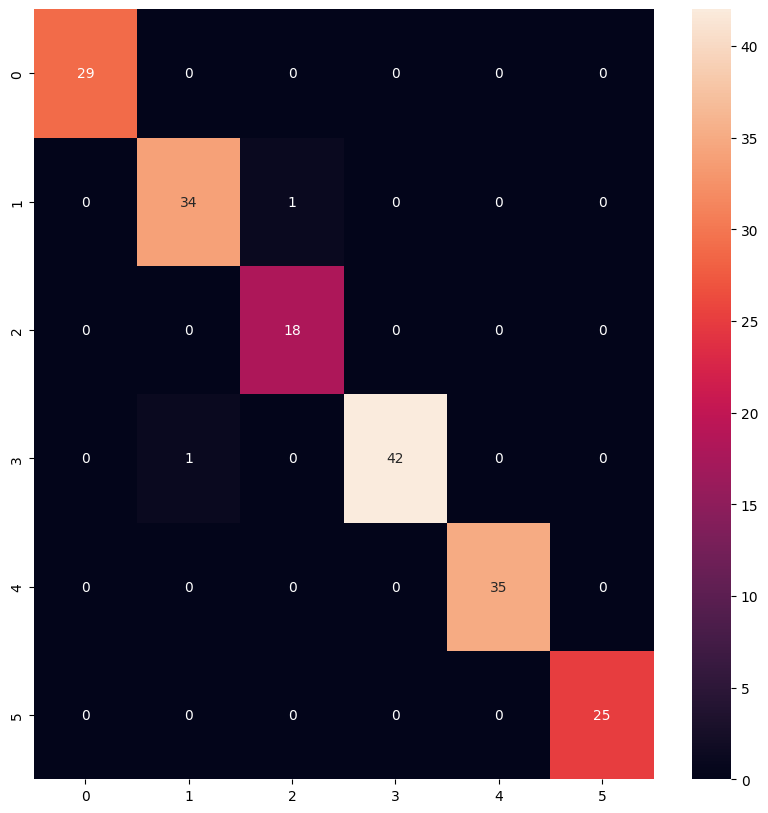

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(pred_df['Actual'], pred_df['Predicted']), annot=True,)

We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [73]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import BernoulliNB

**Now instantiate and fit a model.**

In [74]:
#ENTER YOUR CODE HERE

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print('Shape of the training features dataframe is:', X_train.shape)
print('Shape of the training labels dataframe is:', y_train.shape)
print('Shape of the testing features dataframe is:', X_test.shape)
print('Shape of the testing labels dataframe is:', y_test.shape)
print('The train to test split ratio',X_train.shape[0]/X_test.shape[0])

Shape of the training features dataframe is: (739, 16)
Shape of the training labels dataframe is: (739,)
Shape of the testing features dataframe is: (185, 16)
Shape of the testing labels dataframe is: (185,)
The train to test split ratio 3.9945945945945946


In [76]:
berb = BernoulliNB(alpha=0.0001)
berb.fit(X_train, y_train)
y_pred4 = berb.predict(X_test)

**Predict on the test features, and dont forget to inverse transform!**

In [77]:
#ENTER YOUR CODE HERE

In [78]:
pred_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
pred_df2

,Actual,Predicted
323,0,0
861,0,0
30,2,2
837,3,3
294,4,5
...,...,...
54,1,2
827,1,3
490,0,0
753,5,4


In [79]:
pred_df2['Actual'] = lbe.inverse_transform(pred_df2['Actual'])
pred_df2['Predicted'] = lbe.inverse_transform(pred_df2['Predicted'])
pred_df2

,Actual,Predicted
323,Anger,Anger
861,Anger,Anger
30,Boredom,Boredom
837,Happiness,Happiness
294,Neutral,Sadness
...,...,...
54,Anxiety,Boredom
827,Anxiety,Happiness
490,Anger,Anger
753,Sadness,Neutral


**Finally, print the accuracy, confusion matrix and classification report.**

In [80]:
#ENTER YOUR CODE HERE

In [81]:
print('The accuracy of the Naive Bayes model on the dataset is:', accuracy_score(pred_df2['Actual'], pred_df2['Predicted']))

The accuracy of the Naive Bayes model on the dataset is: 0.4972972972972973


In [82]:
print(classification_report(pred_df2['Actual'], pred_df2['Predicted']))

              precision    recall  f1-score   support

       Anger       0.46      0.79      0.58        29
     Anxiety       0.50      0.06      0.10        35
     Boredom       0.53      0.56      0.54        18
   Happiness       0.69      0.86      0.76        43
     Neutral       0.41      0.54      0.47        35
     Sadness       0.08      0.04      0.05        25

    accuracy                           0.50       185
   macro avg       0.44      0.47      0.42       185
weighted avg       0.47      0.50      0.44       185



<Axes: >

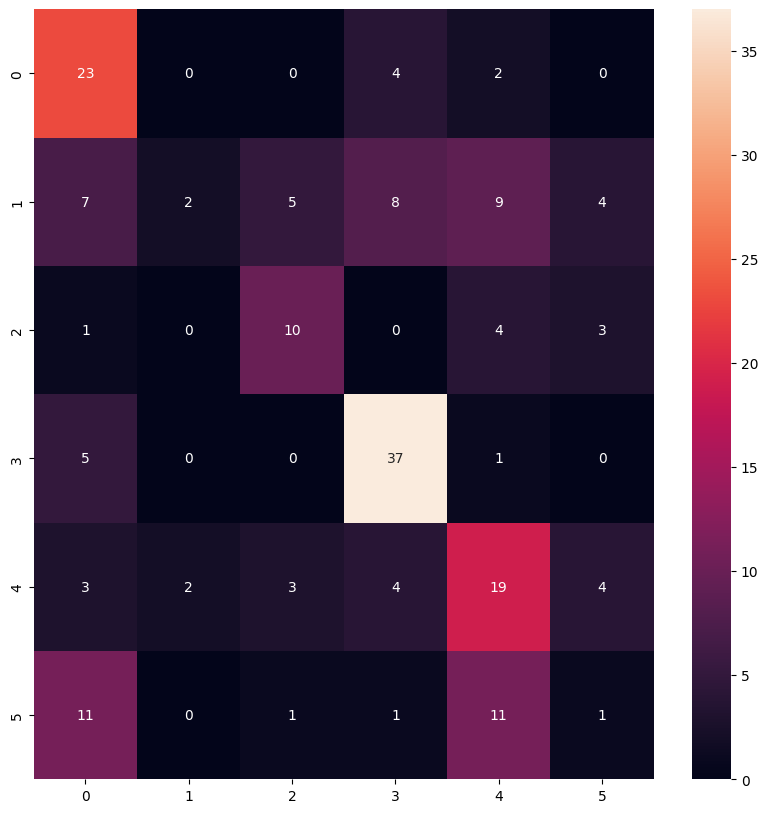

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(pred_df2['Actual'], pred_df2['Predicted']), annot=True)

### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

## **Decision Trees**

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print('Shape of the training features dataframe is:', X_train.shape)
print('Shape of the training labels dataframe is:', y_train.shape)
print('Shape of the testing features dataframe is:', X_test.shape)
print('Shape of the testing labels dataframe is:', y_test.shape)
print('The train to test split ratio',X_train.shape[0]/X_test.shape[0])

Shape of the training features dataframe is: (739, 16)
Shape of the training labels dataframe is: (739,)
Shape of the testing features dataframe is: (185, 16)
Shape of the testing labels dataframe is: (185,)
The train to test split ratio 3.9945945945945946


In [86]:
tree = DecisionTreeClassifier( max_depth = 7,min_samples_split=3,random_state=42)
tree.fit(X_train, y_train)
y_pred5 = tree.predict(X_test)

In [87]:
pred_df3 = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': pd.Series(y_pred5)
})
pred_df3

,Actual,Predicted
0,0,4
1,0,0
2,2,2
3,3,3
4,4,4
...,...,...
180,1,2
181,1,1
182,0,0
183,5,5


In [88]:
pred_df3['Actual'] = lbe.inverse_transform(pred_df3['Actual'])
pred_df3['Predicted'] = lbe.inverse_transform(pred_df3['Predicted'])
pred_df3

,Actual,Predicted
0,Anger,Neutral
1,Anger,Anger
2,Boredom,Boredom
3,Happiness,Happiness
4,Neutral,Neutral
...,...,...
180,Anxiety,Boredom
181,Anxiety,Anxiety
182,Anger,Anger
183,Sadness,Sadness


In [89]:
print('The accuracy of the Decision Tree model on the dataset is:', accuracy_score(pred_df3['Actual'], pred_df3['Predicted']))

The accuracy of the Decision Tree model on the dataset is: 0.8972972972972973


In [90]:
print(classification_report(pred_df3['Actual'], pred_df3['Predicted']))

              precision    recall  f1-score   support

       Anger       0.89      0.86      0.88        29
     Anxiety       0.89      0.97      0.93        35
     Boredom       0.82      0.78      0.80        18
   Happiness       1.00      0.95      0.98        43
     Neutral       0.79      0.89      0.84        35
     Sadness       0.95      0.84      0.89        25

    accuracy                           0.90       185
   macro avg       0.89      0.88      0.89       185
weighted avg       0.90      0.90      0.90       185



<Axes: >

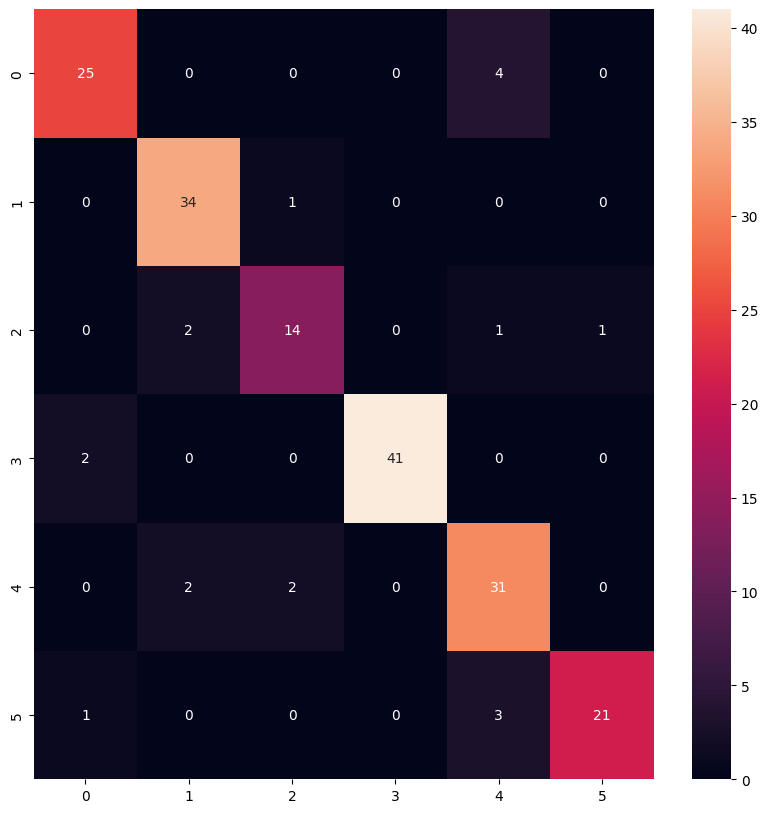

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(pred_df3['Actual'], pred_df3['Predicted']), annot=True)

## **Random Forest Classifier**

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
print('Shape of the training features dataframe is:', X_train.shape)
print('Shape of the training labels dataframe is:', y_train.shape)
print('Shape of the testing features dataframe is:', X_test.shape)
print('Shape of the testing labels dataframe is:', y_test.shape)
print('The train to test split ratio',X_train.shape[0]/X_test.shape[0])

Shape of the training features dataframe is: (739, 16)
Shape of the training labels dataframe is: (739,)
Shape of the testing features dataframe is: (185, 16)
Shape of the testing labels dataframe is: (185,)
The train to test split ratio 3.9945945945945946


In [94]:
forest = RandomForestClassifier(n_estimators=800,max_depth = 6,min_samples_split=2, random_state=42)
forest.fit(X_train, y_train)
y_pred6 = forest.predict(X_test)

In [95]:
pred_df4 = pd.DataFrame({
    'Actual': y_test.reset_index(drop=True),
    'Predicted': pd.Series(y_pred6)
})
pred_df4

,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,3,3
4,4,4
...,...,...
180,1,2
181,1,1
182,0,0
183,5,5


In [96]:
pred_df4['Actual'] = lbe.inverse_transform(pred_df4['Actual'])
pred_df4['Predicted'] = lbe.inverse_transform(pred_df4['Predicted'])
pred_df4

,Actual,Predicted
0,Anger,Anger
1,Anger,Anger
2,Boredom,Boredom
3,Happiness,Happiness
4,Neutral,Neutral
...,...,...
180,Anxiety,Boredom
181,Anxiety,Anxiety
182,Anger,Anger
183,Sadness,Sadness


In [97]:
print('The accuracy of the Random Forest model on the dataset is:', accuracy_score(pred_df4['Actual'], pred_df4['Predicted']))

The accuracy of the Random Forest model on the dataset is: 0.9351351351351351


In [98]:
print('Classification Report:')
print(classification_report(pred_df4['Actual'], pred_df4['Predicted']))

Classification Report:
              precision    recall  f1-score   support

       Anger       0.94      1.00      0.97        29
     Anxiety       1.00      0.86      0.92        35
     Boredom       0.73      0.89      0.80        18
   Happiness       1.00      0.95      0.98        43
     Neutral       0.89      0.94      0.92        35
     Sadness       1.00      0.96      0.98        25

    accuracy                           0.94       185
   macro avg       0.93      0.93      0.93       185
weighted avg       0.94      0.94      0.94       185



<Axes: >

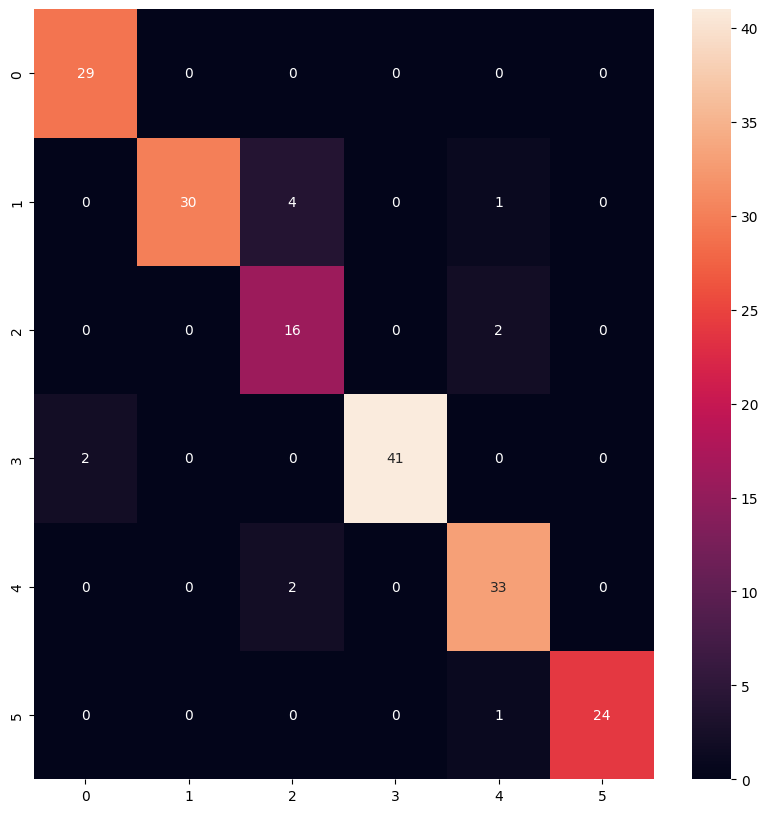

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(pred_df4['Actual'], pred_df4['Predicted']), annot=True)

# GOOD JOB!

#Artificial Neural Network Assignment
###In this assignment you will be implementing various functions from scratch so as to learn how it functions before going on to use various libraries. Doing it honestly will help you a lot in you understanding of the topic. If you encounter difficulties or stuck somewhere go online and search, the possibility that you are encountering the problem first time in 8 billion people is very slim so mostly you will be able to find the solution. Happy learning! 😀

In [100]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [101]:
test = pd.read_csv("C:/Users/chhon/Downloads/mnist_test.csv")
train = pd.read_csv("C:/Users/chhon/Downloads/mnist_train.csv")

In [102]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label

x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

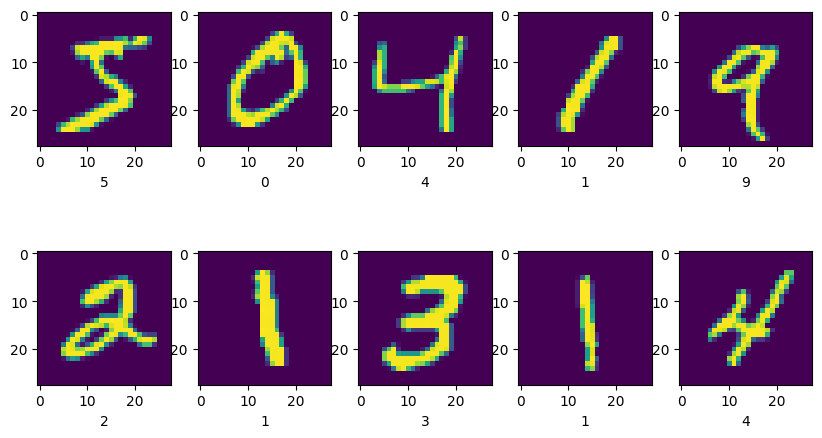

In [103]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

The remainder on dividing your roll number by 4 will dictate which function you have to complete but ofcourse if you wish to do more and there's no stopping you.\
Roll_number % 6  
                  0:RELU\
                  1:softmax\
                  2:forward_propogation\
                  3:one_hot_encode\
                  4:total_loss\
                  5:backward_propagation

In [104]:
class ANN:
  def __init__(self, input_size, output_size, learning_rate, num_layers, num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}

  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size) - 0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}'] = np.random.rand(self.num_of_nodes_layers, self.num_of_nodes_layers) - 0.5
      self.weights_biases[f'b{i}'] = np.random.rand(self.num_of_nodes_layers, 1) - 0.5

    self.weights_biases[f'W{self.num_layers + 1}'] = np.random.rand(self.output_size, self.num_of_nodes_layers) - 0.5
    self.weights_biases[f'b{self.num_layers + 1}'] = np.random.rand(self.output_size, 1) - 0.5

  def RELU(self, Z):
    # Implement the RELU activation function
    return np.maximum(0,Z)

  def RELU_derivative(self, Z):
    return Z > 0

  def softmax(self, Z):
    # Implement the softmax activation function
    exp = np.exp(Z)
    exp = np.array(exp)
    return exp / np.sum(exp, axis=0, keepdims = True)

  def forward_propagation(self, X):
    # Implement the forward_propagation function
    self.activations['A0'] = X
    A = X
    for i in range(1, self.num_layers + 1):
            Z = self.weights_biases[f'W{i}'] @ A + self.weights_biases[f'b{i}']
            A = self.RELU(Z)
            self.activations[f'Z{i}'] = Z
            self.activations[f'A{i}'] = A

    Z_final = self.weights_biases[f'W{self.num_layers + 1}'] @ A + self.weights_biases[f'b{self.num_layers + 1}']
    A_final = self.softmax(Z_final)
    self.activations[f'Z{self.num_layers + 1}'] = Z_final
    self.activations[f'A{self.num_layers + 1}'] = A_final
    return A_final, self.activations

  def one_hot_encode(self, y):
    # Implement one hot encoding
    one_hot = np.zeros((y.size, self.output_size))
    one_hot[np.arange(y.size), y] = 1
    one_hot = one_hot.T
    return one_hot

  def total_loss(self, y_pred, Y):
    # Implement the total loss function
    y_pred = np.clip(y_pred,1e-8,1.0)
    k = Y.shape[1]
    loss = -np.sum(np.multiply(Y, np.log(y_pred))) / k
    return loss

  def backward_prop(self, y_pred, Y):
    #Implement the backward_prop function
    gradients = {}
    m = Y.shape[1]
    dZ = y_pred - Y
    for i in reversed(range(1, self.num_layers + 2)):
        A_prev = self.activations[f'A{i-1}']
        gradients[f'dW{i}'] = dZ @ A_prev.T / m
        gradients[f'db{i}'] = np.sum(dZ, axis=1, keepdims=True) / m
        if i > 1:
            dA_prev = self.weights_biases[f'W{i}'].T @ dZ
            dZ = dA_prev * self.RELU_derivative(self.activations[f'Z{i-1}'])
    return gradients

  def update_params(self,gradients):

    for i in range(1, self.num_layers + 2):
     self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
     self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):
    #implement train
    X = np.array(X)
    y = np.array(y)
    self.initial_params()
    Y = self.one_hot_encode(y)
    for i in range(num_iterations):
        y_pred, activations = self.forward_propagation(X)
        loss = self.total_loss(y_pred, Y)
        gradients = self.backward_prop(y_pred, Y)
        self.update_params(gradients)
        if i % 100 == 0 or i == num_iterations-1:
            print(f"Epoch: {i}, Loss: {loss:.3f}")

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)


        return predictions


In [105]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Epoch: 0, Loss: 12.835
Epoch: 100, Loss: 0.676
Epoch: 200, Loss: 0.486
Epoch: 300, Loss: 0.424
Epoch: 400, Loss: 0.321
Epoch: 500, Loss: 0.286
Epoch: 600, Loss: 0.263
Epoch: 700, Loss: 0.244
Epoch: 800, Loss: 0.228
Epoch: 900, Loss: 0.216
Epoch: 1000, Loss: 0.206
Epoch: 1100, Loss: 0.192
Epoch: 1200, Loss: 0.184
Epoch: 1300, Loss: 0.177
Epoch: 1400, Loss: 0.170
Epoch: 1500, Loss: 0.167
Epoch: 1600, Loss: 0.160
Epoch: 1700, Loss: 0.152
Epoch: 1800, Loss: 0.147
Epoch: 1900, Loss: 0.145
Epoch: 2000, Loss: 0.140
Epoch: 2100, Loss: 0.137
Epoch: 2200, Loss: 0.135
Epoch: 2300, Loss: 0.129
Epoch: 2400, Loss: 0.125
Epoch: 2500, Loss: 0.122
Epoch: 2600, Loss: 0.124
Epoch: 2700, Loss: 0.116
Epoch: 2800, Loss: 0.115
Epoch: 2900, Loss: 0.111
Epoch: 3000, Loss: 0.109
Epoch: 3100, Loss: 0.106
Epoch: 3200, Loss: 0.106
Epoch: 3300, Loss: 0.106
Epoch: 3400, Loss: 0.105
Epoch: 3500, Loss: 0.098
Epoch: 3600, Loss: 0.096
Epoch: 3700, Loss: 0.096
Epoch: 3800, Loss: 0.094
Epoch: 3900, Loss: 0.092
Epoch: 3999

In [106]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 42.76 %


3


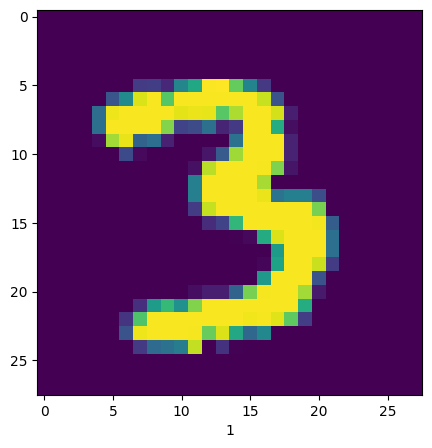

In [107]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
